In [50]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error , r2_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier


In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [22]:
X = df.drop('Purchased' , axis =1)
y = df['Purchased']


In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,random_state = 42 , test_size=0.3)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
X_train

array([[-1.17321186,  1.02166316, -0.84252154,  0.1301563 ],
       [ 0.13400975, -0.97879618,  0.04175763,  0.2777019 ],
       [-0.96666527,  1.02166316,  0.72953032, -1.31579061],
       ...,
       [-0.10173689, -0.97879618,  0.53302383,  1.84168529],
       [-1.48983279,  1.02166316,  0.14001087,  0.18917454],
       [-1.41692836, -0.97879618, -0.54776182,  0.45475663]])

In [41]:
model = GaussianNB()

In [43]:
model.fit(X_train ,  y_train)
y_pred = model.predict(X_test)


In [48]:
cm = confusion_matrix(y_test , y_pred)
acc = accuracy_score(y_test , y_pred)
report = classification_report(y_test , y_pred)
print (cm , acc , report)

[[72  1]
 [11 36]] 0.9               precision    recall  f1-score   support

           0       0.87      0.99      0.92        73
           1       0.97      0.77      0.86        47

    accuracy                           0.90       120
   macro avg       0.92      0.88      0.89       120
weighted avg       0.91      0.90      0.90       120



<Axes: >

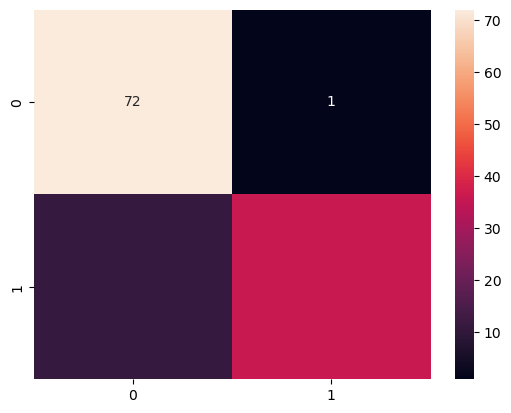

In [49]:
sns.heatmap(cm , annot = True , fmt='d')